In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from textblob import TextBlob

# Load the dataset
file_path = '/content/Gemini API Competition.csv'  # Replace with the actual path to your dataset
# The 'error_bad_lines' argument is deprecated.
# Use 'on_bad_lines' instead to specify how to handle bad lines.
# Setting 'on_bad_lines='skip'' will skip bad lines.
df = pd.read_csv(file_path, delimiter=';', quotechar='"', escapechar='\\', on_bad_lines='skip')

# Basic Overview of the Dataset
print(df.info())  # Show data types and non-null counts
print(df.describe())  # Show basic statistics for numerical columns
print(df.head())  # Show the first few rows to understand the structure

# Handle missing data (if critical columns like 'What it Does' or 'Built With' are missing, we drop those rows)
df_cleaned = df.dropna(subset=['What it Does', 'Built With'])

# Show missing data summary
print(df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2743 non-null   object
 1   Sub-Title     1006 non-null   object
 2   YouTube Link  2788 non-null   object
 3   What it Does  2786 non-null   object
 4   Built With    2603 non-null   object
 5   By            2615 non-null   object
 6   Location      2787 non-null   object
 7   Project Link  2788 non-null   object
dtypes: object(8)
memory usage: 174.4+ KB
None
          Title                            Sub-Title  \
count      2743                                 1006   
unique     2743                                 1006   
top     Davv AI  Interactive Learning the teacher AI   
freq          1                                    1   

                                       YouTube Link  \
count                                          2788   
unique                              

     Technology  Count
0    web/chrome   1307
1      firebase   1085
2       flutter    858
3       android    702
4  google cloud     34
5        arcore     27
6     vertex ai     26
7          none     26
8     cloud run     23
9        python     21


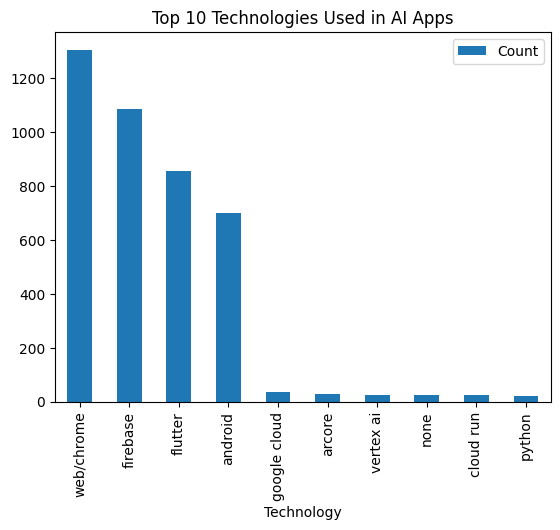

In [20]:
# Analyze which technologies are most commonly used in the AI apps

# Split the 'Built With' column into individual technologies
technologies = df_cleaned['Built With'].dropna().str.split(',').explode()

# Count the occurrences of each technology
tech_counts = Counter(technologies.str.strip().str.lower())

# Create a DataFrame for visualization
tech_df = pd.DataFrame(tech_counts.most_common(), columns=['Technology', 'Count'])

# Display the most commonly used technologies
print(tech_df.head(10))

# Plot the top 10 technologies
tech_df.head(10).plot(kind='bar', x='Technology', y='Count', title='Top 10 Technologies Used in AI Apps')
plt.show()


Location
India            632
United States    403
South Korea      134
Nigeria           92
Brazil            70
Canada            69
Egypt             69
Japan             60
UK                56
Türkiye           53
Name: count, dtype: int64


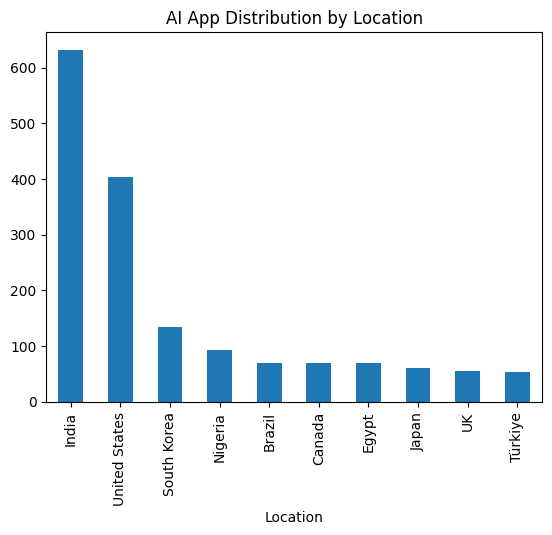

In [21]:
# Analyze the geographical distribution of AI app development

# Count the number of apps by location (geography)
location_counts = df_cleaned['Location'].value_counts()

# Print the most common locations
print(location_counts.head(10))

# Plot the distribution of locations
location_counts.head(10).plot(kind='bar', title='AI App Distribution by Location')
plt.show()


Category
other          1133
education       487
recognition     486
healthcare      375
automation       49
finance          33
Name: count, dtype: int64


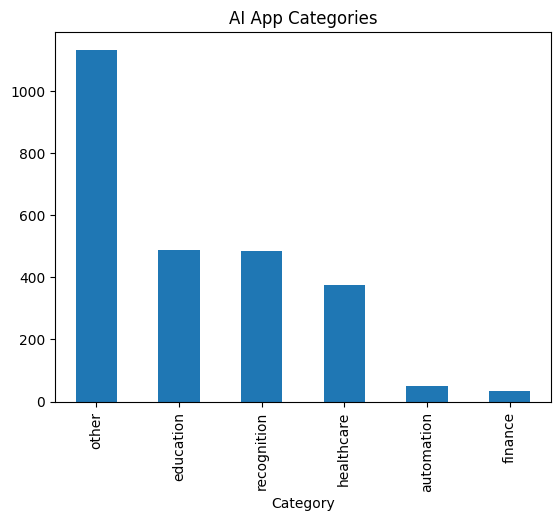

In [22]:
# Categorize AI apps based on their functionality using keywords in 'What it Does'

# Define common categories and relevant keywords
categories = {
    'healthcare': ['health', 'medical', 'hospital', 'patient'],
    'education': ['education', 'learning', 'student'],
    'automation': ['automation', 'automated', 'robotics'],
    'recognition': ['recognition', 'vision', 'image', 'speech'],
    'finance': ['finance', 'investment', 'trading', 'banking'],
    # Add more categories as needed
}

# Function to categorize each app based on keywords
def categorize_app(description):
    for category, keywords in categories.items():
        if any(keyword in description.lower() for keyword in keywords):
            return category
    return 'other'

# Apply the categorization
df_cleaned['Category'] = df_cleaned['What it Does'].apply(categorize_app)

# Show the distribution of app categories
print(df_cleaned['Category'].value_counts())

# Plot the distribution of app categories
df_cleaned['Category'].value_counts().plot(kind='bar', title='AI App Categories')
plt.show()


                          Title  Tech Count
2285                Journey Hub          15
419                   ShortDose          13
1196               Gemini Sight          12
1191                 Distractor          11
2113   Amapola's Digital People          11
2372                Picki Trips          11
2475                 Vodo Drive          10
1210  The Imitatation Nature AI          10
1122                       XYLO          10
941         Polytalk AI Chatbot          10


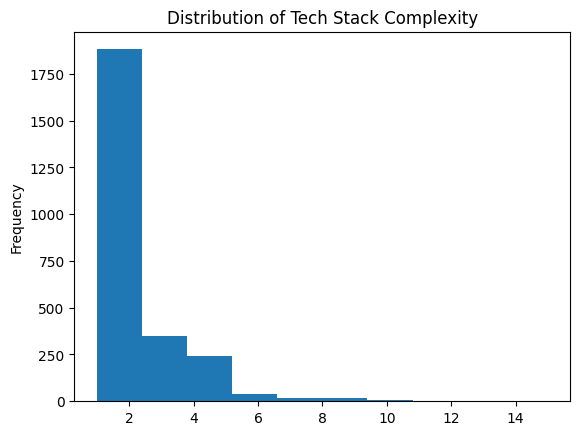

In [23]:
# Analyze the complexity of apps based on the number of technologies used

# Count the number of technologies used in each app
df_cleaned['Tech Count'] = df_cleaned['Built With'].str.split(',').apply(len)

# Show the most complex apps (those with the highest number of technologies used)
most_complex_apps = df_cleaned[['Title', 'Tech Count']].sort_values(by='Tech Count', ascending=False).head(10)
print(most_complex_apps)

# Plot the distribution of technology complexity
df_cleaned['Tech Count'].plot(kind='hist', bins=10, title='Distribution of Tech Stack Complexity')
plt.show()


Sentiment
Positive    2240
Neutral      166
Negative     157
Name: count, dtype: int64


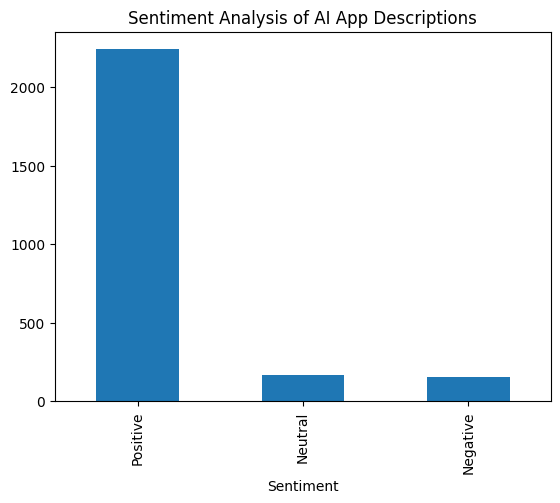

In [24]:
# Perform sentiment analysis on the 'What it Does' column to assess positivity or negativity

# Function to calculate sentiment score using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Apply the sentiment function to the 'What it Does' column
df_cleaned['Sentiment Score'] = df_cleaned['What it Does'].apply(calculate_sentiment)

# Classify the sentiment as Positive, Negative, or Neutral based on the sentiment score
df_cleaned['Sentiment'] = df_cleaned['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Show the distribution of sentiments
print(df_cleaned['Sentiment'].value_counts())

# Plot the sentiment distribution
df_cleaned['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Analysis of AI App Descriptions')
plt.show()


In [25]:
# Function to return top AI apps based on user-inputted features
def find_top_ai_apps_by_features(keywords, df, top_n=5):
    keywords = [keyword.lower() for keyword in keywords]
    app_scores = []

    for index, row in df.iterrows():
        description = str(row['What it Does']).lower()
        built_with = str(row['Built With']).lower()

        match_count = sum([1 for keyword in keywords if keyword in description or keyword in built_with])

        if match_count > 0:
            app_scores.append({
                'Title': row['Title'],
                'Description': row['What it Does'],
                'Matching Features': ', '.join([kw for kw in keywords if kw in description or kw in built_with]),
                'Score': match_count
            })

    # Sort by score and return top N results
    app_scores = sorted(app_scores, key=lambda x: x['Score'], reverse=True)
    return pd.DataFrame(app_scores[:top_n])

# Example user input for features
user_input_keywords = ["machine learning", "automation", "image recognition"]
top_apps = find_top_ai_apps_by_features(user_input_keywords, df_cleaned, top_n=5)
print(top_apps)


              Title                                        Description  \
0  Skin-Sync: Dermi  My app, Skin-Sync, is a comprehensive skincare...   
1        FitnessLad  FitnessLad is a cutting-edge mobile applicatio...   
2               o42  o42 (pronounced "oh-forty-two") is an Artifici...   
3        Nexus AI 2  Nexus AI is a variety of AI models developed t...   
4           Elfelah  Elfelah is an AI-powered farming app that supp...   

                     Matching Features  Score  
0  machine learning, image recognition      2  
1  machine learning, image recognition      2  
2  machine learning, image recognition      2  
3  machine learning, image recognition      2  
4                     machine learning      1  


Correlation between App Complexity and Sentiment Score:
                 Tech Count  Sentiment Score
Tech Count         1.000000         0.024782
Sentiment Score    0.024782         1.000000


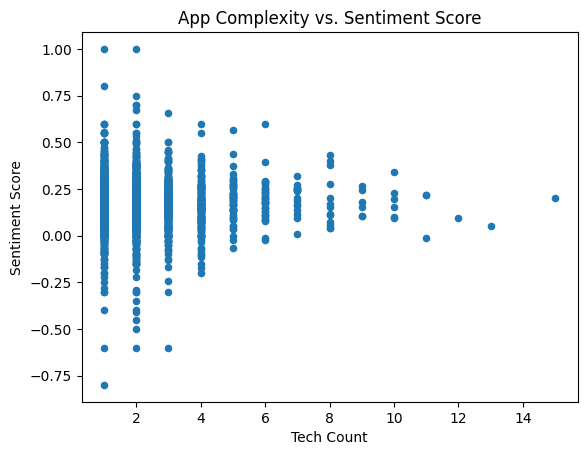

In [17]:
# Calculate correlation between number of technologies used ('Tech Count') and sentiment score ('Sentiment Score')
correlation = df_cleaned[['Tech Count', 'Sentiment Score']].corr()

print("Correlation between App Complexity and Sentiment Score:")
print(correlation)

# Scatter plot to visualize the relationship
df_cleaned.plot(kind='scatter', x='Tech Count', y='Sentiment Score', title='App Complexity vs. Sentiment Score')
plt.show()


In [30]:
# Function to return top AI apps based on user-inputted features
def find_top_ai_apps_by_features(keywords, df, top_n=5):
    # Normalize the input keywords to lowercase for comparison
    keywords = [keyword.lower() for keyword in keywords]

    # List to store apps and their matching scores
    app_scores = []

    # Iterate through each app and calculate how well it matches the user's input
    for index, row in df.iterrows():
        description = str(row['What it Does']).lower()
        built_with = str(row['Built With']).lower()

        # Calculate how many keywords match the app's description or technology stack
        match_count = sum([1 for keyword in keywords if keyword in description or keyword in built_with])

        # Only store apps that have at least one matching feature
        if match_count > 0:
            app_scores.append({
                'Title': row['Title'],
                'Matching Features': ', '.join([kw for kw in keywords if kw in description or kw in built_with]),
                'Score': match_count
            })

    # Sort by score (higher scores mean more matches) and return the top N results
    app_scores = sorted(app_scores, key=lambda x: x['Score'], reverse=True)
    return pd.DataFrame(app_scores[:top_n])

# Get user input for features/technologies at runtime
user_input = input("Enter features or technologies (separate by commas): ")
user_input_keywords = [keyword.strip() for keyword in user_input.split(',')]

# Call the function to get the top 5 AI apps that match the user's input
top_apps = find_top_ai_apps_by_features(user_input_keywords, df_cleaned, top_n=5)

# Display the results: only show the Title and Matching Features
if not top_apps.empty:
    print("\nTop AI Apps based on your input:")
    print(top_apps[['Title', 'Matching Features']])
else:
    print("No AI apps found matching the given features.")


Enter features or technologies (separate by commas): image generator

Top AI Apps based on your input:
                          Title Matching Features
0                  Gemini Morph   image generator
1  AI - Story & Image Generator   image generator
2                     PaperPlay   image generator
3               MyStoryCrafters   image generator
4          Zeta Comic Generator   image generator
